# Projeto e_Comerce

# Case
Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Lendo no arquivo csv do Ecommerce Customers **

In [2]:
clientes = pd.read_csv("Ecommerce Customers")

In [3]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
# Verificando se Possui Valores Nulos Escondidos
mask_NULL = (clientes['Avg. Session Length'] == 0.0) | (clientes['Time on App'] == 0.0) | (clientes['Time on Website'] == 0.0) | (clientes['Length of Membership'] == 0.0) | (clientes['Yearly Amount Spent'] == 0.0)
df_mask_null = clientes.loc[mask_NULL]
df_mask_null

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


## Análise de dados exploratória


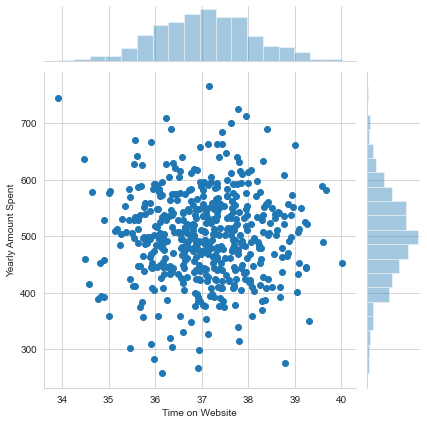

In [7]:
# Verificando correlação entre Time On Website e Volume anual
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=clientes)
plt.show()

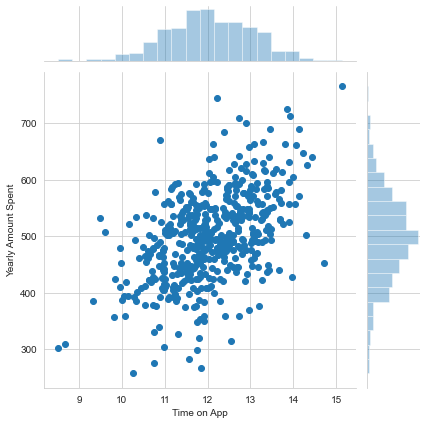

In [8]:
# Verificando correlação entre Time On App e Volume anual
sns.set_style('whitegrid')
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=clientes)
plt.show()

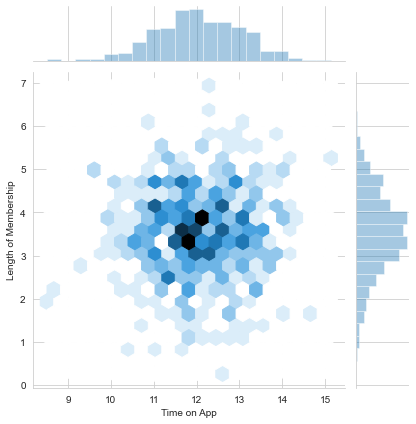

In [9]:
# Realcao  Tempo no aplicativo (Time on App) X Tempo da associação (Length of Membership)
sns.set_style('whitegrid')
sns.jointplot(x='Time on App',y='Length of Membership',data=clientes,kind="hex")
plt.show()

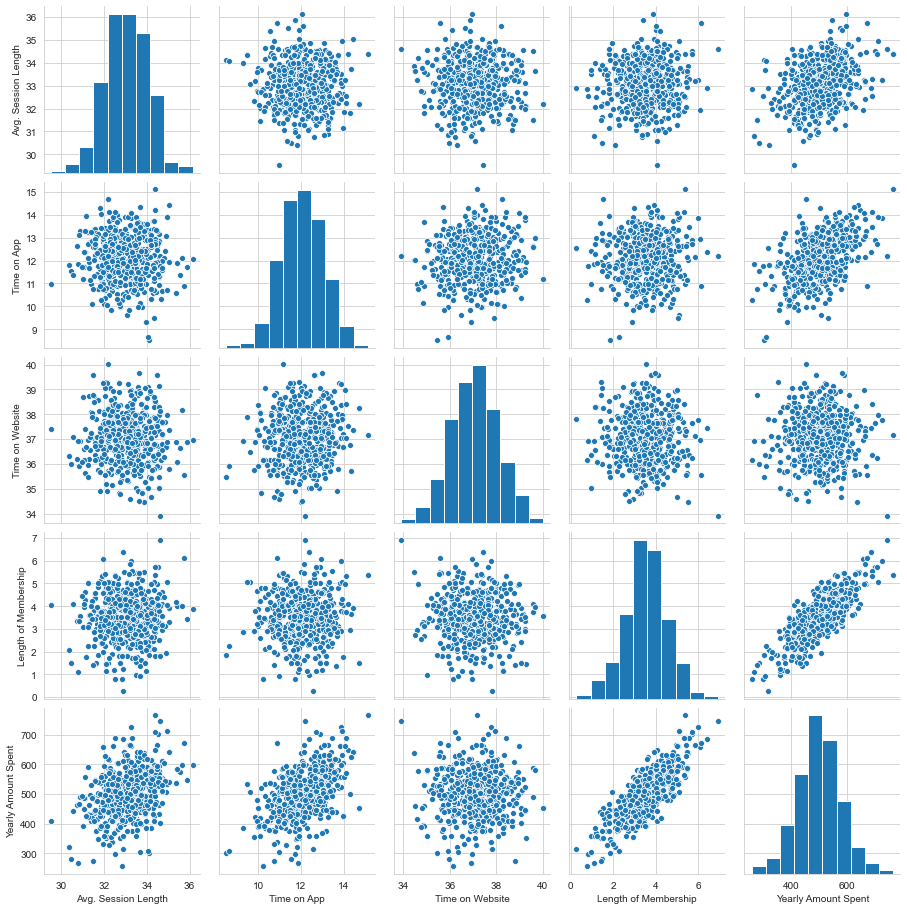

In [10]:
# Explorando relacoes em todo o conjunto de dados
sns.pairplot(clientes)
plt.show()

** Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent) é o há quantos anos o cliente é membro (Length of Membership) **

** Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership). **

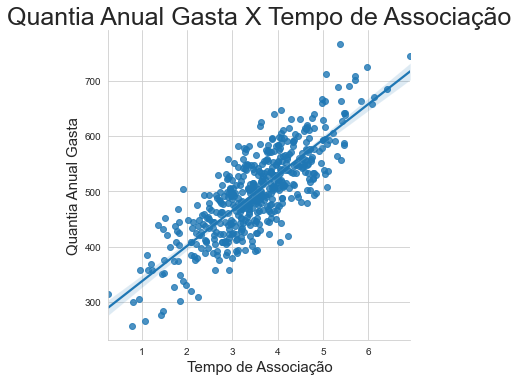

In [11]:
# Crie um plot de um modelo linear da 
# quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership)
sns.lmplot('Length of Membership','Yearly Amount Spent',data=clientes)
plt.title('Quantia Anual Gasta X Tempo de Associação',size=25)
plt.xlabel('Tempo de Associação',size=15)
plt.ylabel('Quantia Anual Gasta',size=15)
plt.show()

## Treinando e testando os dados

### Separando os Dados

In [12]:
x = clientes[['Length of Membership','Time on App','Time on Website','Avg. Session Length']]

In [13]:
y = clientes['Yearly Amount Spent']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 101)

## Treinando o modelo


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print os coeficientes do modelo**

In [18]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [61.27909654 38.59015875  0.19040528 25.98154972]


## Previsão de dados de teste

In [19]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

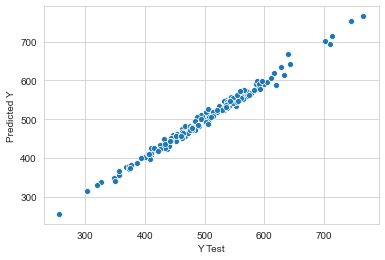

In [20]:
sns.scatterplot(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430847
MSE: 79.8130516509747
RMSE: 8.933815066978648


## Resíduos

**Tracando um histograma dos resíduos e certificando-se de que ele parece normalmente distribuído.**

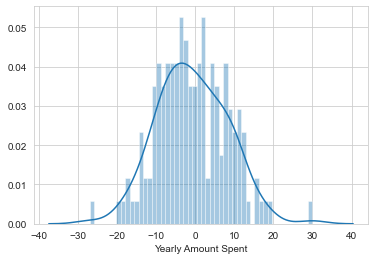

In [22]:
sns.distplot((y_test-predictions),bins=50);

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.


In [23]:
df_coef = (pd.DataFrame(lm.coef_,x.columns))
df_coef.columns = ['Coefs']
df_coef

,Coefs
Length of Membership,61.279097
Time on App,38.590159
Time on Website,0.190405
Avg. Session Length,25.981550


Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,98 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,59 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo no site está associado a um aumento de 0,19 dólares em dólares.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,27 dólares em dólares.

Primeiramente, a empresa provevelmente deveria arranjar outras formas de fidelizar seu cliente, já que essa é a variável que mais ifluenciam os gastos dos seus usuários. Entre site e aplicativo, investiriamos no aplicavo, dado que o mesmo apresenta um coeficiente significativamente maior do que o site.